In [9]:
##### setting
### set filename you want to analysis
filepath = None

if filepath == None:
    import os
    import smooziee
    filepath = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GX711_p0p25_RT_4')
    
filename = os.path.basename(filepath)

In [11]:
##### import
import smooziee.smooziee.peak_search as pksearch
import imp
imp.reload(pksearch)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lmfit

In [12]:
##### read data from filename
data_df = pd.read_csv(filepath, sep='\s+')
x_arr = np.array(data_df.meV)
y_arr = np.array(data_df.y_unitpk)

In [13]:
##### make object
processor = pksearch.PeakSearch(x_arr, y_arr, name=filename)

found 5 peaks
[7, 21, 28, 36, 47]


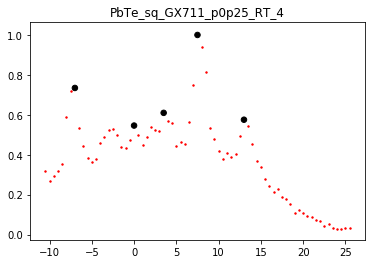

In [14]:
##### find peak automatically
processor.find_peak(order=5, verbose=True)


### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)
print(processor.ix_peaks)

[7, 15, 21, 28, 36, 47, 55]


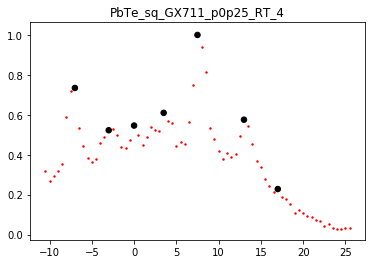

In [15]:
##### add peak by hand

### test mode
# processor.add_peak(idx=55, run_mode='test')

### add mode
processor.add_peak(idx=55, run_mode='add')
processor.add_peak(idx=15, run_mode='add')

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)
print(processor.ix_peaks)

In [16]:
##### remove peak by hand
# processor.remove_peak(21)
# print(processor.peak_idx_lst)

found 3 pair
[[7, 47], [15, 36], [21, 28]]


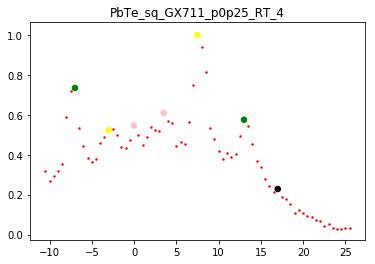

In [17]:
##### find peak pair automatically
processor.find_peak_pair(threshold=10, verbose=True)
print(processor.ix_peak_pairs)

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

current peak_idx_lst
[7, 15, 21, 28, 36, 47, 55]

initial peak_pair_idx_lst
[[7, 47], [15, 36], [21, 28]]

revised peak_pair_idx_lst
[[7, 36], [15, 28]]


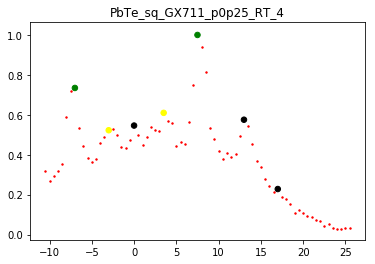

In [18]:
##### find peak pair by hand
print("current peak_idx_lst")
print(processor.ix_peaks)
print("")
print("initial peak_pair_idx_lst")
print(processor.ix_peak_pairs)

### test
# processor.revise_peak_pair([[7,36], [15,28]], run_mode='test')

### revise
processor.revise_peak_pair([[7,36], [15,28]], run_mode='revise')

print("")
print("revised peak_pair_idx_lst")
print(processor.ix_peak_pairs)

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

In [19]:
import pickle
with open('pksearch.pickle', mode='wb') as f:
    pickle.dump(processor, f)